# 🚢 Titanic Data Analysis (Pandas 101)

Dans ce notebook, nous allons pratiquer **toutes les méthodes fondamentales de manipulation de données** avec **Pandas**, étape par étape, sur le dataset **Titanic**.



## 📌 1️⃣ Importer les librairies et le dataset

# 📑 Définition des colonnes — Titanic Dataset

| Colonne | Description |
|----------------|------------------------------------------------------------------|
| **PassengerId** | Identifiant unique du passager. |
| **Survived** | Statut de survie (0 = Non, 1 = Oui). |
| **Pclass** | Classe du billet (1 = 1ère, 2 = 2ème, 3 = 3ème). |
| **Name** | Nom complet du passager. |
| **Sex** | Sexe du passager (male / female). |
| **Age** | Âge du passager en années (peut contenir des valeurs manquantes). |
| **SibSp** | Nombre de frères/sœurs ou conjoints à bord. |
| **Parch** | Nombre de parents/enfants à bord. |
| **Ticket** | Numéro du billet. |
| **Fare** | Prix du billet payé (en livres sterling). |
| **Cabin** | Numéro de cabine (souvent manquant). |
| **Embarked** | Port d’embarquement (C = Cherbourg, Q = Queenstown, S = Southampton). |


## 🗂️ Détails

- **SibSp** : Frères, sœurs, conjoints.
- **Parch** : Parents, enfants.
- **Embarked** : Port où le passager est monté à bord.
- **Cabin** : Souvent manquant — certains passagers n’avaient pas de cabine attribuée ou enregistrée.
- **Fare** : Peut varier même pour la même classe en fonction de la cabine, du point d’embarquement et du statut de réservation.


👉 **Référence** : Ce dataset est tiré des archives originales du Titanic, largement utilisé pour apprendre la classification binaire et les méthodes d’exploration de données.



In [14]:
from sklearn.impute import SimpleImputer

In [10]:
import pandas as pd

# Charger Titanic
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
DF = df.copy()
# Afficher les 5 premières lignes
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
DF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 📌 2️⃣ Inspection de base

In [9]:
df.shape

(891, 12)

In [8]:
print(len(df.columns))

12


In [2]:
# Informations générales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Statistiques descriptives
df.describe(include='all').T.style.background_gradient(cmap='Blues')


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


In [12]:
# Identifying columns with missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Vérifier les valeurs manquantes
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

In [20]:
df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
# import matplotlib.pyplot as plt
# df['Embarked'].plot()



most_common = df['Embarked'].mode()[0]
print(most_common)
df['Embarked'].fillna(most_common, inplace=True)

S


In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [37]:
# For 'Cabin' - Filling with a placeholder
df['Cabin'].fillna('Unknown', inplace=True)

C:\Users\Kered\AppData\Local\Temp\ipykernel_4816\4004112512.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Unknown', inplace=True)


In [38]:
#Creating new features
df['Family_Size'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0


In [ ]:
# Extracting 'Title' from 'Name'
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

df.head(10)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Kered\AppData\Local\Temp\ipykernel_4816\3267933178.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,Mr
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Unknown,Q,0,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Unknown,S,4,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Unknown,S,2,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Unknown,C,1,Mrs


In [42]:
# Converting categorical variables into numerical form
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'])
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Unknown,...,False,False,False,False,False,True,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,False,False,False,False,False,False,True,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Unknown,...,False,False,True,False,False,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,False,False,False,False,False,False,True,False,False,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Unknown,...,False,False,False,False,False,True,False,False,False,False


In [45]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Family_Size', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Capt', 'Title_Col',
       'Title_Countess', 'Title_Don', 'Title_Dr', 'Title_Jonkheer',
       'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle',
       'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev',
       'Title_Sir'],
      dtype='object')

### Visualisation valeurs manquante

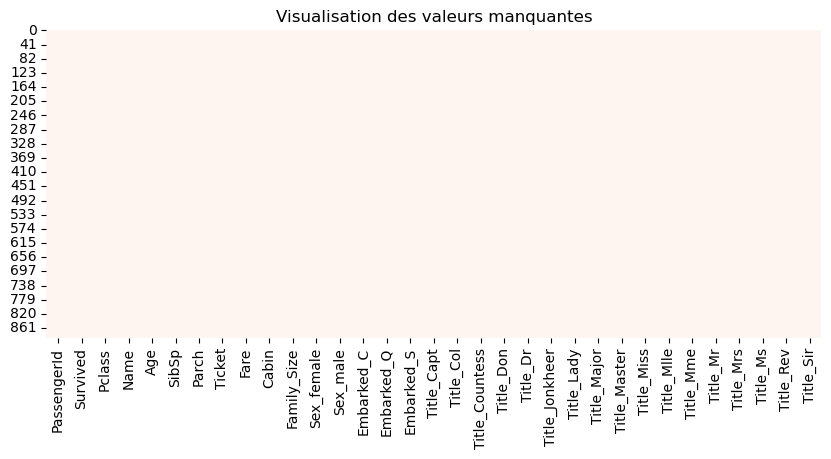

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Visualisation des valeurs manquantes")
plt.show()

## 📌 3️⃣ Sélections : loc & iloc


- **`loc`** : Sélectionne des lignes et colonnes **par leurs étiquettes** (noms).
  - Ex. : `df.loc[2, 'Name']` → valeur de la colonne *Name* pour l’index 2.
- **`iloc`** : Sélectionne des lignes et colonnes **par position numérique**.
  - Ex. : `df.iloc[2, 3]` → même chose si *Name* est la 4ᵉ colonne.



In [8]:
# loc : par étiquette
df.loc[:4, ['Name', 'Age', 'Sex']]




,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male


In [11]:
# iloc : par position
df.iloc[:5, [3, 5, 4]]

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male


## 📌 4️⃣ Filtrer : conditions et query


- **Filtrage** : Extraire un sous-ensemble selon une **condition logique**.
  - Ex. : `df[df['Age'] > 30]` → lignes où l’âge est > 30.
- **`query`** : Équivalent SQL, plus lisible pour des conditions complexes.
  - Ex. : `df.query("Sex == 'female' & Age < 20")`.


In [17]:
# Filtrer les passagers adultes
adults = df[df['Age'] >= 18 ]
adults
# Même filtrage avec query
adults_q = df.query("Age >= 18")
adults_q


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 📌 5️⃣ Nettoyage : drop & drop_duplicates

- **`drop`** : Supprime des colonnes ou lignes.
  - Ex. : `df.drop(['Cabin'], axis=1)` → supprime la colonne *Cabin*.
- **`drop_duplicates`** : Supprime les lignes en double pour éviter les doublons.


In [18]:
# Supprimer une colonne inutile
df = df.drop(['Cabin'], axis=1)




In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
# Vérifier doublons
print(df.duplicated().sum())

0


In [ ]:
# Supprimer doublons s'il y en a
df = df.drop_duplicates()

## 📌 6️⃣ Trier : sort_values

- Trie les données par une ou plusieurs colonnes.
  - Ex. : `df.sort_values(by='Age', ascending=False)` → trie du plus vieux au plus jeune.


In [24]:
# Trier par Age décroissant
df_sorted = df.sort_values(by='Fare', ascending=False)
df_sorted.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S


## 📌 7️⃣ Grouper : groupby

- Regroupe les données **par une ou plusieurs colonnes clés** pour effectuer des opérations par groupe.
  - Ex. : `df.groupby(['Pclass', 'Sex'])` → regroupe par *classe* et *sexe*.



In [29]:
# Grouper par classe et sexe
grouped = df.groupby(['Pclass', 'Sex'])
grouped.size()
#grouped.head()


Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

## 📌 8️⃣ Agrégations : agg & aggregate

- Applique **une ou plusieurs fonctions d’agrégation** sur chaque groupe créé par `groupby`.
  - Ex. : `agg(['mean', 'median'])` → calcule la moyenne et la médiane.
  - Ex. : `agg({'Age': 'mean', 'Fare': 'max'})` → moyenne sur *Age*, max sur *Fare*.


In [30]:
# Moyenne et médiane de l'âge
agg_age = grouped['Age'].agg(['mean', 'median'])
agg_age




mean  median
Pclass Sex                      
1      female  34.611765    35.0
       male    41.281386    40.0
2      female  28.722973    28.0
       male    30.740707    30.0
3      female  21.750000    21.5
       male    26.507589    25.0

In [31]:
#Agrégations multiples
agg_multi = grouped.agg({
    'Age': ['mean', 'std'],
    'Fare': ['mean', 'max']
})
agg_multi

Age                   Fare          
                    mean        std        mean       max
Pclass Sex                                               
1      female  34.611765  13.612052  106.125798  512.3292
       male    41.281386  15.139570   67.226127  512.3292
2      female  28.722973  12.872702   21.970121   65.0000
       male    30.740707  14.793894   19.741782   73.5000
3      female  21.750000  12.729964   16.118810   69.5500
       male    26.507589  12.159514   12.661633   69.5500

## 📌 9️⃣ Table pivot : pivot_table

- **`pivot`** : Transforme les données en **tableau croisé** (index, colonnes, valeurs).
  - Simple mais nécessite que l’index/colonnes soient uniques.
- **`pivot_table`** : Plus flexible, permet de gérer plusieurs valeurs par groupe avec une fonction d’agrégation.
  - Ex. : `pivot_table(values='Fare', index='Pclass', columns='Sex', aggfunc='mean')`.


In [32]:
# Survie par classe et sexe
pivot = df.pivot_table(
    values='PassengerId',
    index='Pclass',
    columns='Sex',
    aggfunc='count'
)
pivot


Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


## 📌 🔀 1️⃣0️⃣ Format long : melt

- **Inverse de `pivot`** : Passe d’un format large à un format **long**.
  - Ex. : Plusieurs colonnes → une seule colonne *variable*, une *valeur*.


In [33]:
pivot_reset = pivot.reset_index()
melted = pivot_reset.melt(id_vars=['Pclass'], var_name='Sex', value_name='Count')
melted


,Pclass,Sex,Count
0,1,female,94
1,2,female,76
2,3,female,144
3,1,male,122
4,2,male,108
5,3,male,347


## 📌 🔗 1️⃣1️⃣ Fusionner : merge
- Combine plusieurs DataFrames **sur une clé commune** (équivalent SQL `JOIN`).
  - Ex. : `df.merge(df2, on='Pclass')`.


In [36]:
# Exemple : DataFrame des classes
df_classes = pd.DataFrame({
    'Pclass': [1, 2, 3],
    'Description': ['Upper', 'Middle', 'Lower']
})

df = df.merge(df_classes, on='Pclass', how='left')
df[['Pclass', 'Description']].drop_duplicates()

df.head()
#df_classes.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Description
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Lower
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Upper
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Lower
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Upper
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Lower


## 📌 🧮 1️⃣2️⃣ Appliquer une fonction : apply et map
- **`apply`** : Applique une fonction sur chaque élément ou ligne/colonne.
  - Ex. : `df['Age'].apply(lambda x: x*2)`.
- **`map`** : Remplace ou transforme **chaque valeur individuelle** d’une série.
  - Ex. : `df['Sex'].map({'male': 'M', 'female': 'F'})`.



In [38]:
# Exemple : créer groupe d'âge
df['AgeGroup'] = df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')

# Remplacer Sexe par initiale (map)
df['SexInitial'] = df['Sex'].map({'male': 'M', 'female': 'F'})
#df.head()
df[['Name', 'Age', 'AgeGroup', 'Sex', 'SexInitial']].head()


,Name,Age,AgeGroup,Sex,SexInitial
0,"Braund, Mr. Owen Harris",22.0,Adult,male,M
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,Adult,female,F
2,"Heikkinen, Miss. Laina",26.0,Adult,female,F
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,Adult,female,F
4,"Allen, Mr. William Henry",35.0,Adult,male,M


## 📌 📊 1️⃣3️⃣ Compter valeurs : value_counts

In [39]:
df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

## ✅ ✔️ Sauvegarde finale

In [16]:
df.to_csv('titanic_final.csv', index=False)
